# **Tech Challenge 01**

> Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais pelo seguro de saúde.

In [ ]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Criando uma conexão com o Google Drive onde está localizado o arquivo CSV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregando o arquivo CSV para uma variavel
medical_df = pd.read_csv('drive/MyDrive/Pos_IA4Devs/Health_insurance.csv')

# **Exploração dos Dados**


> **O Problema**: Com a pequena amostra de dados fornecidos, foi buscado bases similares para compor um maior volume de informações para dar sequencia nas análises e treinamentos. <br>
Dessa forma, foi encontrada o [banco](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) que contem dados históricos de encargos médicos reais incorridos por mais de 1300 clientes. <br>
A base encontrada se asemelha bastante com o exemplo fornecido e foi possível utiliza-la para completar o exercício. Porém, seus dados estão em inglês, o que não se tornou um problema para o desenvolvimento das análises.
<br>
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">




Nós vamos criar um dataframe com a biblioteca Pandas usando os dados encontrados a fim de ver e analisar os dados encontrados.

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northwest,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300
...,...,...,...,...,...,...,...
1336,50,male,30.970000,3,no,northwest,10600.548300
1337,18,female,31.920000,0,no,northeast,2205.980800
1338,18,female,36.850000,0,no,southeast,1629.833500
1339,21,female,25.800000,0,no,southwest,2007.945000


In [ ]:
# Explorando os dados de forma geral
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   int64  
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   int64  
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [ ]:
medical_df.shape

(1341, 7)

In [ ]:
# Procurando por falta de informações dentro do dataset
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

O banco possui 1341 linhas e 7 colunas e todos campos possuem informações, nenhum campo está vazio. Facilitando o processo de tramento de dados.

> age &rarr; idade <br>
 sex &rarr; genêro <br>
 bmi &rarr; imc <br>
 children &rarr; filhos <br>
 smoker &rarr; fumante <br>
 charges &rarr; encargos <br>
 region &rarr; região <br>
 * northeast &rarr; nordeste<br>
 * northwest &rarr; noroeste<br>
 * southeast &rarr; sudeste<br>
 * southwest &rarr; sudoeste<br>
>

A ideia desse projeto é encontrar a melhor forma de estimar os encargos usando valores das outras colunas. <br>
Obtenado sucesso com a analise prediiva com os dados históricos, seriamos capaz de estimar o encargo para novos clientes, apenas por saber as demais informações dele.<br>
<br>
Entranto, para chegar nesse resultado será necessário lançar uma exploração análica da base de dados usada.

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.219239,30.653446,1.094705,13299.809561
std,14.044321,6.096393,1.204770,12113.807202
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4746.344000
50%,39.000000,30.360000,1.000000,9391.346000
75%,51.000000,34.675000,2.000000,16796.411940
max,64.000000,53.130000,5.000000,63770.428010


Não será necessário um trabalho de limpa nos dados do banco, pois de acordo com as análises feitas das informações obtidas com os últimos métodos executados, os dados estão consistentes para serem trabalhos.

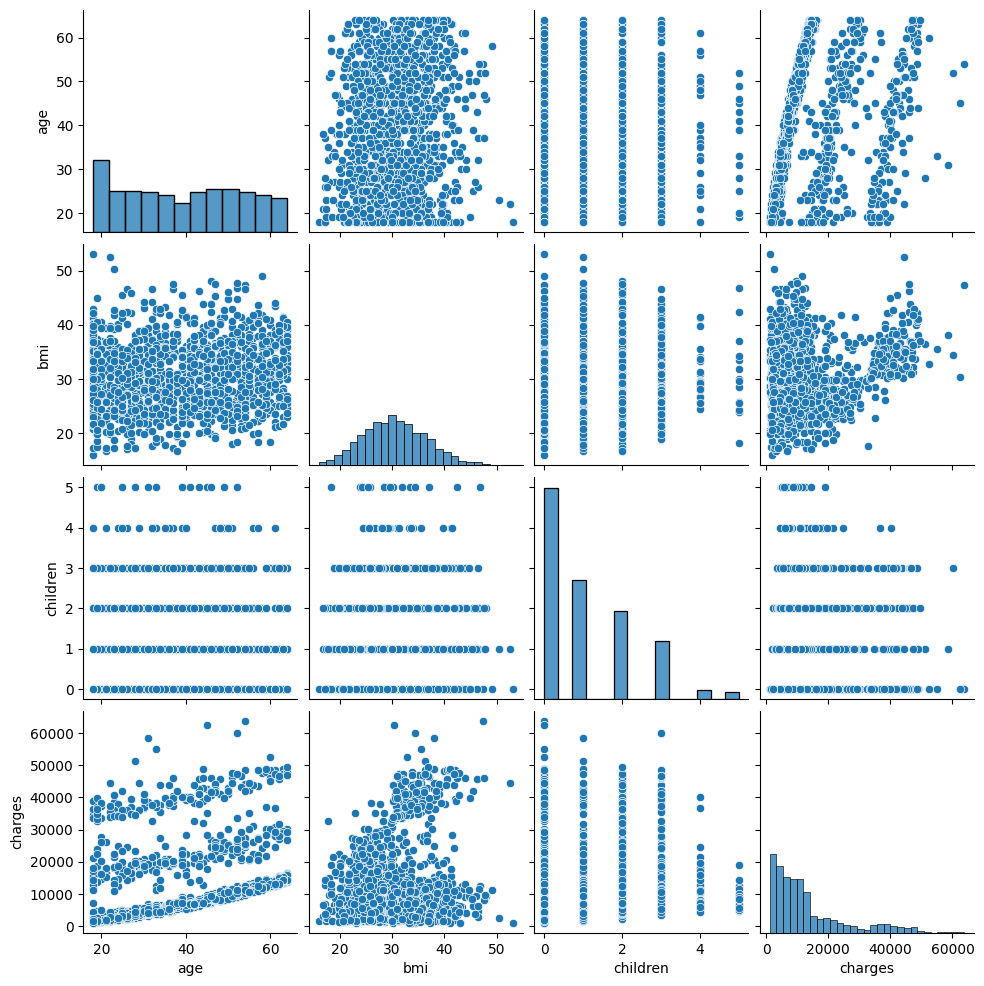

In [ ]:
sns.pairplot(medical_df)
plt.show()

### Idade (*'age'*)

> Coluna numérica

A distribuição é uniforme, pelo menos de 20 a 30 clientes em cada faixa etaria, excepcionalmente entre 18 e 19 anos, aos quais possuem uma grande maioria de clientes. Isso se deve aos planos de saúde serem mais baratos para idades.


In [ ]:
medical_df.age.describe()

count    1341.000000
mean       39.219239
std        14.044321
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribuição de Idade')
fig.update_layout(bargap=0.1)
fig.show()

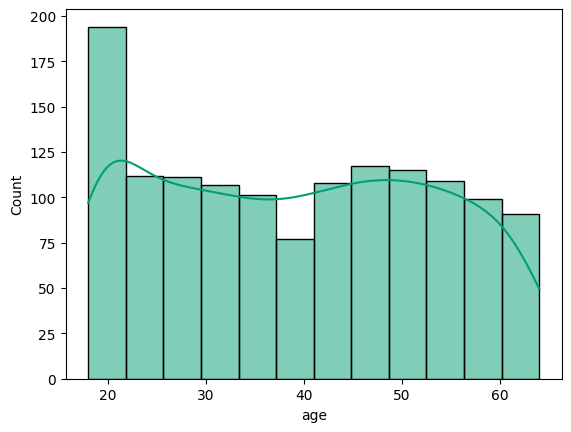

In [ ]:
sns.histplot(medical_df["age"],kde=True, color=sns.color_palette('colorblind')[2])
plt.show()

### IMC - Índice de Massa Corporal (*'BMI - Body Mass Index'*)

> Coluna numérica

As métricass de IMC se assemelham a uma distribuição Gaussiana centralizada nos 30, porém com alguns registros nas periferias. Essa configuração se deve ao fato de que os indivíduos com esse índice costumam ser mais saudáveis, tornando planos de saúde mais atrativos financeiramente para os clientes.


In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'],
                   title='Distribuição de IMC (Indice de Massa Corporal)')
fig.update_layout(bargap=0.1)
fig.show()

### Encargos (*'Charges'*)

> Coluna numérica

Distribuição de encargos médicos anual. <br>
Por meio da análise gráfica, correlacionando as informações com a coluna da indicação de fumante, é possível notar que para a maioria dos clientes pagam menos do que \$14k e apenas uma minoria paga mais do que isso.
Além disso, fica claro que fumantes pagam mais do que não fumantes de forma geral.

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker',
                   title='Custo Médico Anual por Pessoas Fumantes ou Não')
fig.update_layout(bargap=0.1)
fig.show()

### Comparativo de distribuição de encargos com outros fatores como 'genêro' e 'região'.


In [ ]:
fig = px.histogram(medical_df, x = 'charges', color = 'sex',
                   color_discrete_sequence = ["pink","blue"],
                   title = 'Diferença de Custos Médicos por Gênero')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box', color='region',
                  title = 'Custos Médicos por Diferentes Regiões')
fig.update_layout(bargap=0.1)
fig.show()

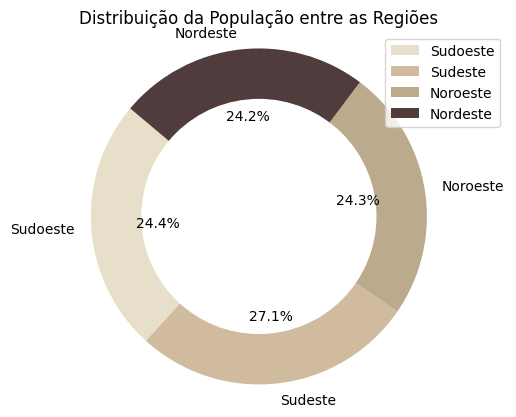

In [ ]:
regions = ['southwest', 'southeast', 'northwest', 'northeast']
counts = [(medical_df['region'] == item).sum() for item in regions]

# Define labels for the counts
labels = ['Sudoeste', 'Sudeste', 'Noroeste', 'Nordeste']

# Crie um gráfico de pizza
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#E8DFCA', '#D1BB9E', '#BBAB8C', '#503C3C'])

# Desenhe um círculo no centro para criar um anel
circulo_centro = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_centro)

# A proporção de aspecto igual garante que o gráfico de pizza seja desenhado como um círculo
plt.axis('equal')

# Defina os rótulos em português
plt.title('Distribuição da População entre as Regiões')
plt.legend(labels)

### Fumante (*'smoker'*)

Vamos visualizar a distribuição da coluna “fumante” (contendo valores “sim” e “não”) por meio de um histograma.

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1066
yes     275
Name: count, dtype: int64

In [ ]:
px.histogram(
    medical_df,
    x='smoker',
    color='sex',
    title='Smoker',
    color_discrete_sequence = ["pink","blue"],
)

Parece que 20% dos clientes relataram que fumam. Podemos constatar também que fumar parece ser um hábito mais comum entre os homens. Isto é verdade apenas para o conjunto de dados fornecido e, portanto, devemos sempre verificar se esses resultados da análise também correspondem à população em geral na qual usaremos nosso modelo.

### Filhos (*'Children'*)

> Coluna numérica

In [ ]:
child = px.histogram(medical_df, x='children', title='Número de Filhos',
                     color='sex')
child.update_layout(bargap=0.1)
child.show()

### Distribuição das colunas 'encargos' e 'filhos'

In [ ]:
fig = px.histogram(medical_df, x = 'charges', marginal ="box",
                   color = 'children', title = 'Custos por Número de Filhos')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
px.violin(medical_df,x = 'children',y = 'charges')

É possível concluir que pessoas que possuem mais filhos, em média, pagam mais do que as demais.

### Comparativo entre Idade, Encargos e Fumantes


In [ ]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', opacity=0.8,
                 hover_data=['sex'],
                 title='Comparativo entre Idade, Encargos e Fumantes')
fig.update_traces(marker_size=5)
fig.show()

Sem dúvida é possível inferir que a idade interfere nos encargos.
Entretanto, no mesmo grupo de idade é possível ver certas discrepâncias nos valores cobrados no plano de saúde, ou seja, **idade não é o único fato que interefere**.

Além disso, é possível notar no gráfico a discrepancia no valor dos encargos entre os fumantes e os não fumantes, assim também provando uma forte variável no valor do plano.

Existem diversos outliers dentro do grupo dos não fumantes na mesma idade, esses casos provavelmente se devem a individuoes com doenças genéticas ou que sofreram algum acidente.

### Comparativo entre IMC, Encargos e Fumantes

In [ ]:
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker', opacity=0.8,
                 hover_data=['sex'],
                 title='Comparativo entre IMC, Encargos e Fumantes')
fig.update_traces(marker_size=5)
fig.show()

Pela análise do gráfico, não parece existir nenhuma relação com o aumento do IMC para não fumantes com os encargos, entretanto, para fumantes acima do IMC de 30 existe uma grande relevância.

### Corelação das colunas 'Encargos', 'Região' e 'Genêro'

In [ ]:
px.histogram(medical_df,x='sex',y = 'charges',color = 'region')

# **Pré-processamento de Dados**

Como foi visto anteriormente, não é necessário fazer nenhuma limpeza na base de dados, devido ao fato de que já foi contastado que todos as linhas e todas as colunas estão preenchidas com dados de acordo com a sua tipagem correta. Além disso, não apresenta nenhum valor que esteja destoando do restante, como foi possível contestar na análise gráfica feita previamente.

Entretanto, para criar um modelo de Machine Learning para prever os engarcos médicos é necessário que todas as colunas possuem valores numéricos.
Utilizar a ponderação arbitrária, no que consiste em transformar diretamente um texto em um número (nordeste=1, sudeste=2) pode criar uma ordenação e pesos para as categorias que não refletem a realidade, tornando o modelo muito impreciso.

Pois então, será adotado a abordagem de One-Hot Enconding para o caso da coluna de regiões, e as demais que estão no tipo de texto será adotada a simples categorização binária


## Categorização Binária

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,56,female,29.774374,2,yes,southwest,31109.889763,1,0
1,46,male,25.857395,1,no,northwest,26650.702647,0,1
2,32,male,23.014840,0,no,southwest,21459.037990,0,1
3,19,female,27.900000,0,yes,southwest,16884.924000,1,0
4,18,male,33.770000,1,no,southeast,1725.552300,0,1
...,...,...,...,...,...,...,...,...,...
1336,50,male,30.970000,3,no,northwest,10600.548300,0,1
1337,18,female,31.920000,0,no,northeast,2205.980800,0,0
1338,18,female,36.850000,0,no,southeast,1629.833500,0,0
1339,21,female,25.800000,0,no,southwest,2007.945000,0,0


## One-hot Encoding

O processo correto de transformação das variáveis categóricas é feito a partir da criação de novas colunas a partir das categorias. Cada uma delas se torna uma nova coluna e o valor na linha correspondente será 1, caso tenha a presença da característica. Do contrário, será 0. Esse processo é conhecido como codificação "one-hot".

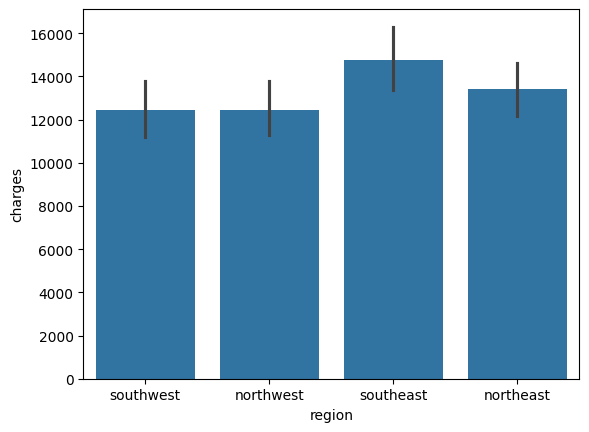

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast']]).toarray()

array([[1., 0., 0., 0.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,56,female,29.774374,2,yes,southwest,31109.889763,1,0,0.0,0.0,0.0,1.0
1,46,male,25.857395,1,no,northwest,26650.702647,0,1,0.0,1.0,0.0,0.0
2,32,male,23.014840,0,no,southwest,21459.037990,0,1,0.0,0.0,0.0,1.0
3,19,female,27.900000,0,yes,southwest,16884.924000,1,0,0.0,0.0,0.0,1.0
4,18,male,33.770000,1,no,southeast,1725.552300,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,50,male,30.970000,3,no,northwest,10600.548300,0,1,0.0,1.0,0.0,0.0
1337,18,female,31.920000,0,no,northeast,2205.980800,0,0,1.0,0.0,0.0,0.0
1338,18,female,36.850000,0,no,southeast,1629.833500,0,0,0.0,0.0,1.0,0.0
1339,21,female,25.800000,0,no,southwest,2007.945000,0,0,0.0,0.0,0.0,1.0


# **Modelagem**

## Coeficiente de Correlação - Interpretação

Se faz necessário encontrar uma correlação expressa numericamente entre as colunas da tabela e ver a qual mais impacta nos 'Encargos'.

Para isso, iremos calcular o _coeficiente de correlação_ fazendo uso do método *.corr* da biblioteca Pandas.

Para encontrar numericamente o coeficiente de correlação de colunas na tipagem de texto, será necessário transforma-las em numéricas transformando as informações binárias (sim ou não) em números.

> Maior o valor absoluto, maior o coeficiente, maior a correlação
 * Os valores extremos de -1 e 1 indicam uma relação perfeitamente linear onde uma mudança numa variável é acompanhada por uma mudança perfeitamente consistente na outra. Para esses relacionamentos, todos os pontos de dados ficam em uma linha.
 * Coeficiente de zero representa que a coluna não influencia em nada a outra.
 * O sinal da correção representa a direção da correlação
  * (+): quanto maior a correlação da coluna, maior para outra coluna
  * (-): quanto maior a correlação da coluna, menor para outra coluna
>


In [ ]:
# Coeficiente de correlação da coluna Idades com a coluna 'Encargos'
medical_df.charges.corr(medical_df.age)

0.2998168473985228

In [ ]:
# Coeficiente de correlação da coluna IMC com a coluna 'Encargos'
medical_df.charges.corr(medical_df.bmi)

0.1964540990337707

In [ ]:
# Coeficiente de correlação da coluna Encargos com a coluna 'Encargos'
medical_df.children.corr(medical_df.charges)

0.06816803728190923

In [ ]:
# Não conseguimos encontrar a correlação da tabela com valores do tipo texto
# Por esse motivo iremos remover essas colunas da tabela
medical_df = medical_df.drop(columns=['sex', 'smoker', 'region'])

In [ ]:
# Correlação da tabela completa
medical_df.corr()

,age,bmi,children,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
age,1.000000,0.109170,0.043406,0.299817,-0.023192,-0.021741,0.001981,-0.000058,-0.012160,0.010676
bmi,0.109170,1.000000,0.013557,0.196454,0.004301,0.044884,-0.137071,-0.136138,0.270685,-0.007691
children,0.043406,0.013557,1.000000,0.068168,0.009134,0.015840,-0.022688,0.024721,-0.022936,0.021675
charges,0.299817,0.196454,0.068168,1.000000,0.786323,0.057349,0.004968,-0.039246,0.072363,-0.040688
smoker_code,-0.023192,0.004301,0.009134,0.786323,1.000000,0.073742,0.002403,-0.038119,0.067923,-0.034660
sex_code,-0.021741,0.044884,0.015840,0.057349,0.073742,1.000000,-0.002830,-0.009817,0.016650,-0.004616
northeast,0.001981,-0.137071,-0.022688,0.004968,0.002403,-0.002830,1.000000,-0.319881,-0.344521,-0.320529
northwest,-0.000058,-0.136138,0.024721,-0.039246,-0.038119,-0.009817,-0.319881,1.000000,-0.345923,-0.321833
southeast,-0.012160,0.270685,-0.022936,0.072363,0.067923,0.016650,-0.344521,-0.345923,1.000000,-0.346624
southwest,0.010676,-0.007691,0.021675,-0.040688,-0.034660,-0.004616,-0.320529,-0.321833,-0.346624,1.000000


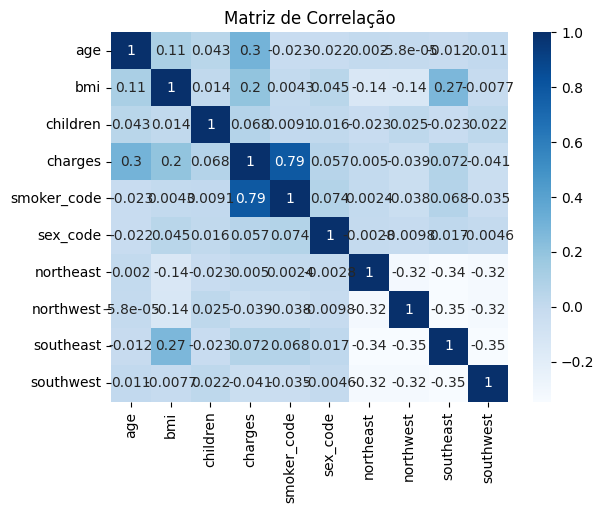

In [ ]:
# Mapa de calor de correlações
sns.heatmap(medical_df.corr(), cmap='Blues', annot=True)
plt.title('Matriz de Correlação');

## Regressão Linear

Para prever qual o encargo baseado em parâmetros definidos, será necessário o uso de um modelo preditivo de regressão, no caso iremos utilizar a fórmula de Regrerssão Linear simples, que pode ser conhecida como:

$y = wx + b$

A linha caracteriza dois números: $w$ (chamado de "inclinação") e $b$ (chamado de "intercepto"). Já o $x$ é um dos campos do nosso dataframe.

A carater demonstrativo iremos apenas considerar a coluna de idades (ages) para representar uma prova de valor do modelo.

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges(30,w,b)

1600

In [ ]:
# Aplicando a fórumla na coluna de idades
ages = medical_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0       2900
1       2400
2       1700
3       1050
4       1000
        ... 
1336    2600
1337    1000
1338    1000
1339    1150
1340    3150
Name: age, Length: 1341, dtype: int64

In [ ]:
# Podemos comparar com os resultados reais da coluna de encargos
medical_df.charges

0       31109.889763
1       26650.702647
2       21459.037990
3       16884.924000
4        1725.552300
            ...     
1336    10600.548300
1337     2205.980800
1338     1629.833500
1339     2007.945000
1340    29141.360300
Name: charges, Length: 1341, dtype: float64

Para conseguir um entendimento melhor da comparação entre nosso modelo de regressão e os dados reais é possível plotar um gráfico com ambos valores juntos.

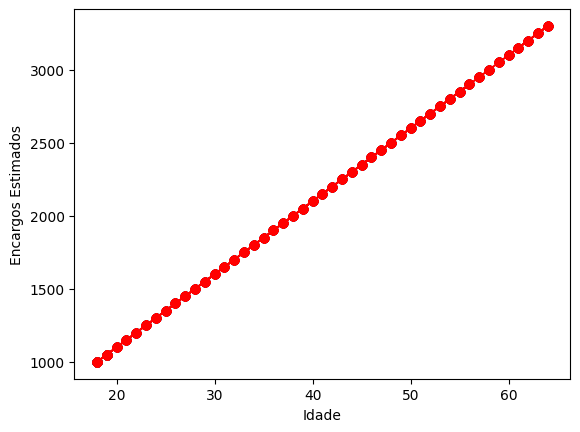

In [ ]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Idade');
plt.ylabel('Encargos Estimados');

Experamos que os pontos do gráfico gerado pelo método criado esteja o mais próximo possível do real, porém, ainda não estão aceitavelmente próximos.

Para termos essa comparação mais clara, iremos plotar os dois gráficos juntos e testar mais alguns valores para $b$ e $w$.

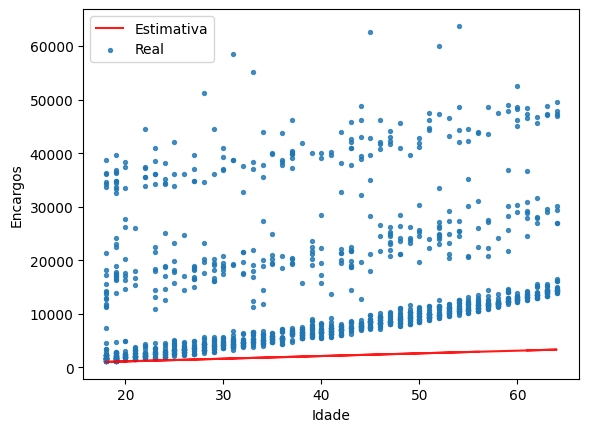

In [ ]:
target = medical_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Idade');
plt.ylabel('Encargos')
plt.legend(['Estimativa', 'Real']);

In [ ]:
# Encontrar melhores valores para 'w' e 'b'
def try_parameters(w, b):
    ages = medical_df.age
    target = medical_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Idade');
    plt.ylabel('Encargos')
    plt.legend(['Estimativa', 'Real']);

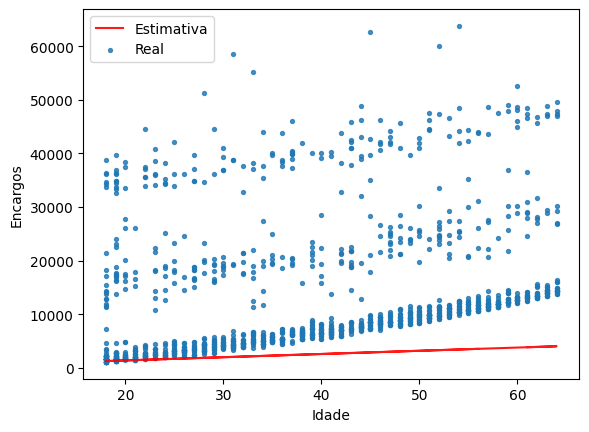

In [ ]:
try_parameters(60, 200)

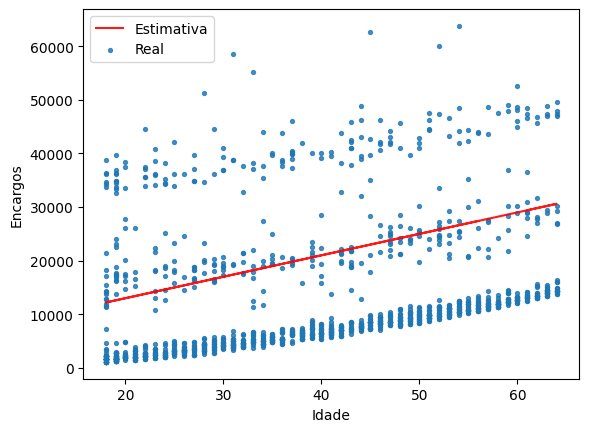

In [ ]:
try_parameters(400, 5000)

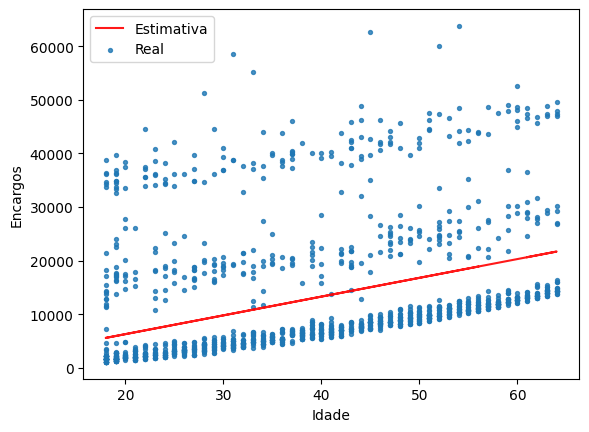

In [ ]:
try_parameters(350,-700)

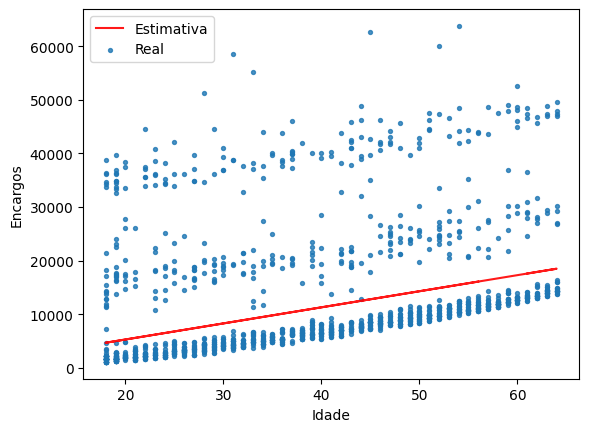

In [ ]:
try_parameters(300,-700)

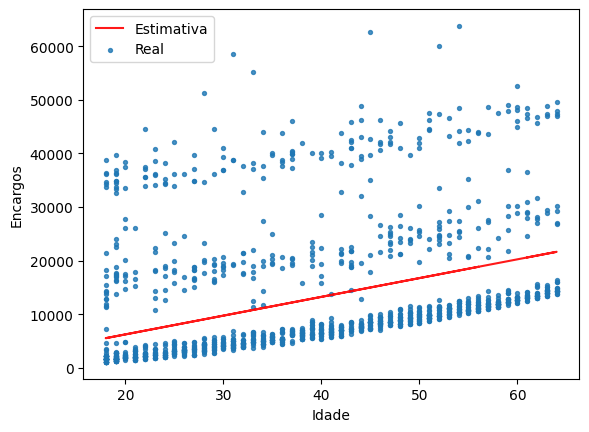

In [ ]:
try_parameters(350,-750)

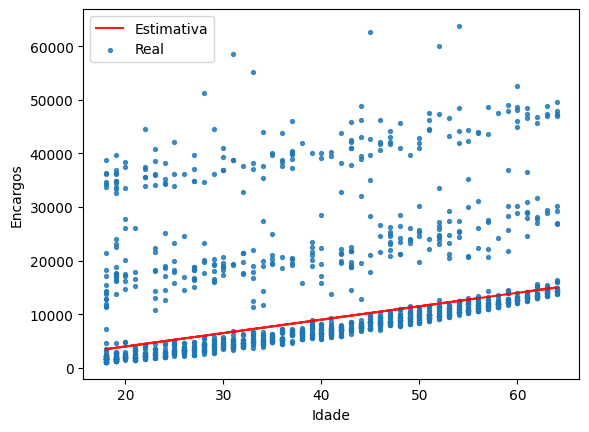

In [ ]:
try_parameters(250,-1000)

Aparentemente, a nossa reta de estimativas parece estar a mais próxima dos encargos reais, porém é impossível de ter certeza sem um método bem definido de comparação.

Dessa forma, se faz necessário uma métrica para validar se nosso modelo está próximo da realidade.

## Conjunto de Treinamento e Teste


Para criarmos nosso modelo de Machine Learning será necessário dividir o dataset em um conjunto de dados para treinamento e um outro para teste.

Iremos fazer isso utilizando já as colunas que apresentam maior grau de correspondência com a coluna encargos (_'encargos'_), no caso são as colunas: idade (_'age'_), imc (_'bmi'_), filhos (_'children'_) e fumante (_'smoker'_).

In [ ]:
# Definindo os parâmetros e os alvos
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

In [ ]:
# Separando os dados em conjuntos de treino e teste
# tanto para os alvos assim como para os parâmetros
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=7)
targets_train

41      39774.2763
783     18259.2160
369     13430.2650
1300     4340.4409
655      8280.6227
           ...    
211     13880.9490
502     13470.8600
537     13831.1152
1220     4058.1161
175      1694.7964
Name: charges, Length: 1072, dtype: float64

# **Validação Estatistica**

Precisamos de uma métrica para validar a eficácia do modelo.

Para isso iremos utilizar a Função de Perda, que podemos definir utilizando a estratégia da raiz do valor quadrático médio ou RMSE (root-mean-square-error), que irá calcular a diferença entre os alvos e predições feitas pelo modelo. Em sequência é feita a média dos elementos e finalmente para equilibrar a quadratura fazemos a raiz quadrada dos resultados obtidos na etapa anterior e assim obtemos nossa Função de Perda.

In [ ]:
# Definindo a formula de RMSE - Root Mean Square Error
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
def printRmse(targets, predictions):
  print('Função de Perda (RMSE): ', rmse(targets, predictions))

O resultado é chamado de 'perda' pois indica o quão ruim é a previsão do modelo. Quando menor o valor, melhor o modelo desenvolvido.

In [ ]:
def try_parameters_withLoss(w, b):
    ages = medical_df.age
    target = medical_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Idades');
    plt.ylabel('Encargos')
    plt.legend(['Predição', 'Real']);

    loss = rmse(target, predictions)
    print("Função de Perda: ", loss)

Função de Perda:  16381.158220686975


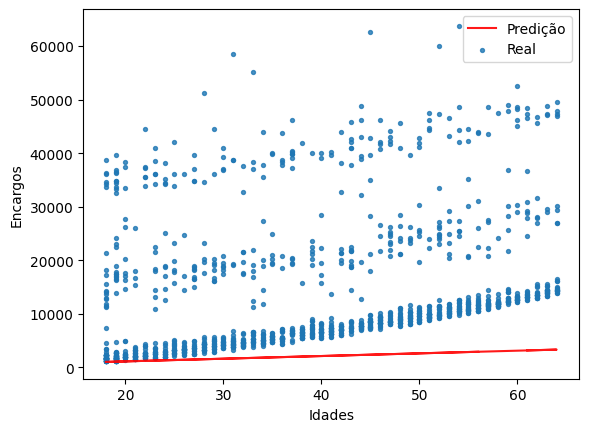

In [ ]:
try_parameters_withLoss(50, 100)

Função de Perda:  12470.424164709455


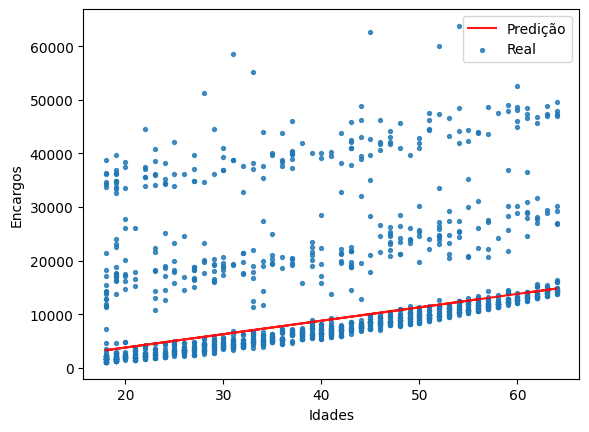

In [ ]:
try_parameters_withLoss(250,-1200)

Função de Perda:  11864.207330501182


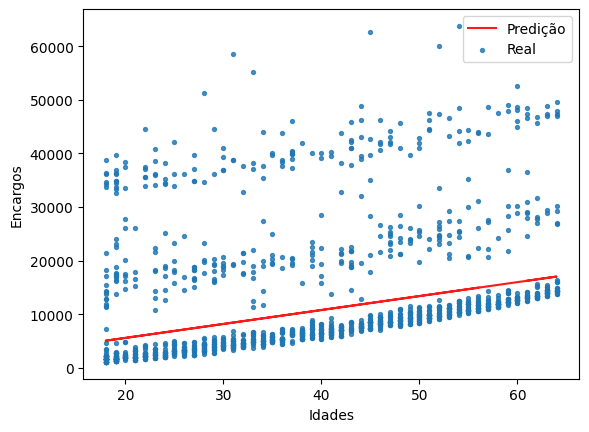

In [ ]:
try_parameters_withLoss(260, 400)

Função de Perda:  11652.640876100291


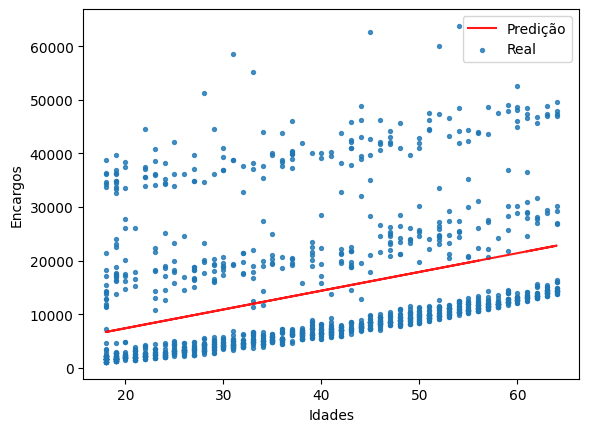

In [ ]:
try_parameters_withLoss(350, 400)

# **Treinamento e Avaliação do Modelo**

In [ ]:
medical_df

,age,bmi,children,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,56,29.774374,2,31109.889763,1,0,0.0,0.0,0.0,1.0
1,46,25.857395,1,26650.702647,0,1,0.0,1.0,0.0,0.0
2,32,23.014840,0,21459.037990,0,1,0.0,0.0,0.0,1.0
3,19,27.900000,0,16884.924000,1,0,0.0,0.0,0.0,1.0
4,18,33.770000,1,1725.552300,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1336,50,30.970000,3,10600.548300,0,1,0.0,1.0,0.0,0.0
1337,18,31.920000,0,2205.980800,0,0,1.0,0.0,0.0,0.0
1338,18,36.850000,0,1629.833500,0,0,0.0,0.0,1.0,0.0
1339,21,25.800000,0,2007.945000,0,0,0.0,0.0,0.0,1.0


Dessa vez, iremos usar a regresão linear da biblioteca Sklearn para treinar e testar nosso modelo de regressão.

In [ ]:
# Criando o modelo e treinando
# ['age', 'bmi', 'children', 'smoker_code']
model = LinearRegression().fit(inputs_train, targets_train)

# Gerando predições
predictions_test = model.predict(inputs_test)

# Avaliando o modelo com a função de perda
loss = printRmse(targets_test, predictions_test)

Função de Perda (RMSE):  5943.858834017838


Podemos utilizar as demais colunas para formar uma análise mais completa possível para o modelo preditivo regressivo.

Assim geramos os inputs, o alvo e os dataframes de teste e treino

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=7)

Podemos comparar os pesos fazendo uso da fórmula:

$encargos = w_1 \times idade + w_2 \times imc + w_3 \times filhos + w_4 \times fumantes + w_5 \times gênero + w_6 \times região + b$

In [ ]:
# Criando o modelo e treinando
model = LinearRegression().fit(inputs_train, targets_train)

# Gerando predições
predictions_test = model.predict(inputs_test)

# Avaliando o modelo com a função de perda
loss = printRmse(targets_test, predictions_test)

Função de Perda (RMSE):  5975.875105289591


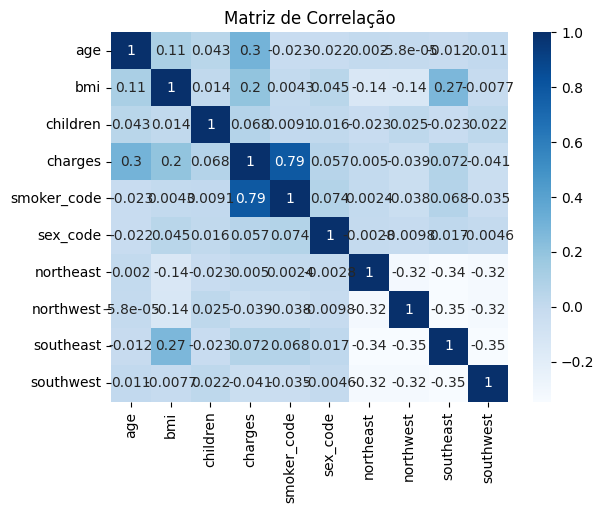

In [ ]:
# Mapa de calor de correlações
sns.heatmap(medical_df.corr(), cmap='Blues', annot=True)
plt.title('Matriz de Correlação');

In [ ]:
# Definindo os parâmetros e os alvos

inputColumns = ['smoker_code', 'children', 'bmi', 'age']
targetColumn = ['charges']

In [ ]:
def estimate_charges(dataframe):
  inputs_train, inputs_test, targets_train, targets_test = train_test_split(dataframe[inputColumns], dataframe[targetColumn], test_size=0.2,random_state=7)

  # Criando o modelo e treinando
  model = LinearRegression().fit(inputs_train, targets_train)

  # Gerando predições
  predictions_test = model.predict(inputs_test)

  # Avaliando o modelo com a função de perda
  loss = printRmse(targets_test, predictions_test)

In [ ]:
estimate_charges(medical_df)

Função de Perda (RMSE):  5943.858834017837


Teria como melhorar ainda mais?

In [ ]:
nonSmokers_df = medical_df[medical_df.smoker_code == 0]
smokers_df = medical_df[medical_df.smoker_code == 1]

In [ ]:
estimate_charges(nonSmokers_df)

Função de Perda (RMSE):  4549.6088045856395


In [ ]:
estimate_charges(smokers_df)

Função de Perda (RMSE):  4638.1744867629895
